In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from datetime import datetime 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("all_stocks_5yr.csv",delimiter=",",on_bad_lines="skip")
print(df.shape)
print(df.sample(7))

(619040, 7)
              date    open    high      low   close   volume  Name
123165  2013-04-24   35.14   35.93   35.040   35.87  1607621   CMA
158983  2013-09-03   84.31   84.75   83.440   84.06  2473687    DE
27392   2016-11-18   86.40   86.70   85.150   85.79   576230   AIZ
603292  2015-07-27   29.71   30.05   29.632   29.99  5260386    WY
413510  2016-11-14   43.99   44.16   43.010   43.07  4815833  NLSN
11335   2013-02-14   31.03   31.54   30.960   31.40  7250119   ADM
55570   2014-07-30  111.47  113.00  108.760  109.87  6011938   APC


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df["date"]=pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


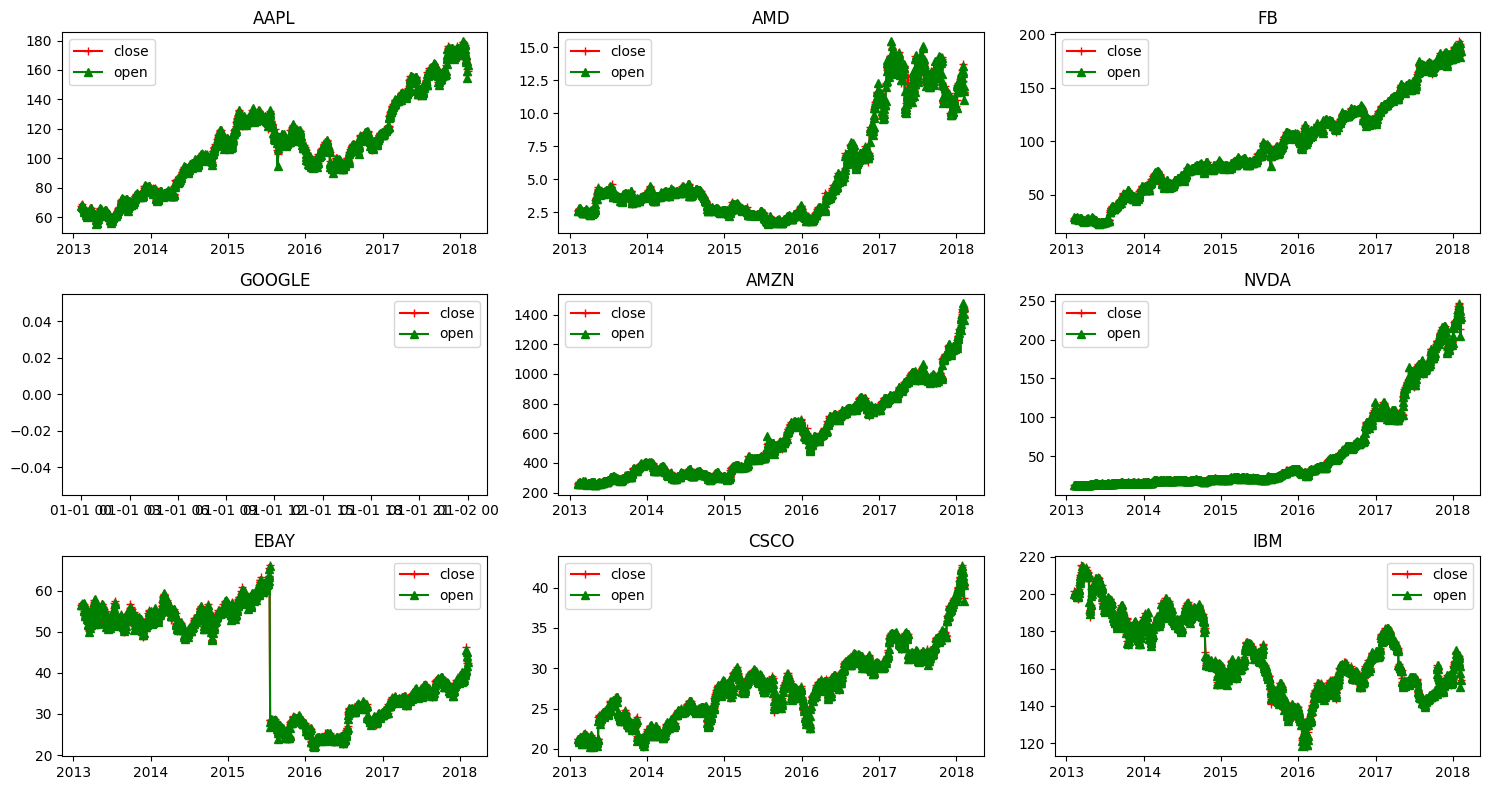

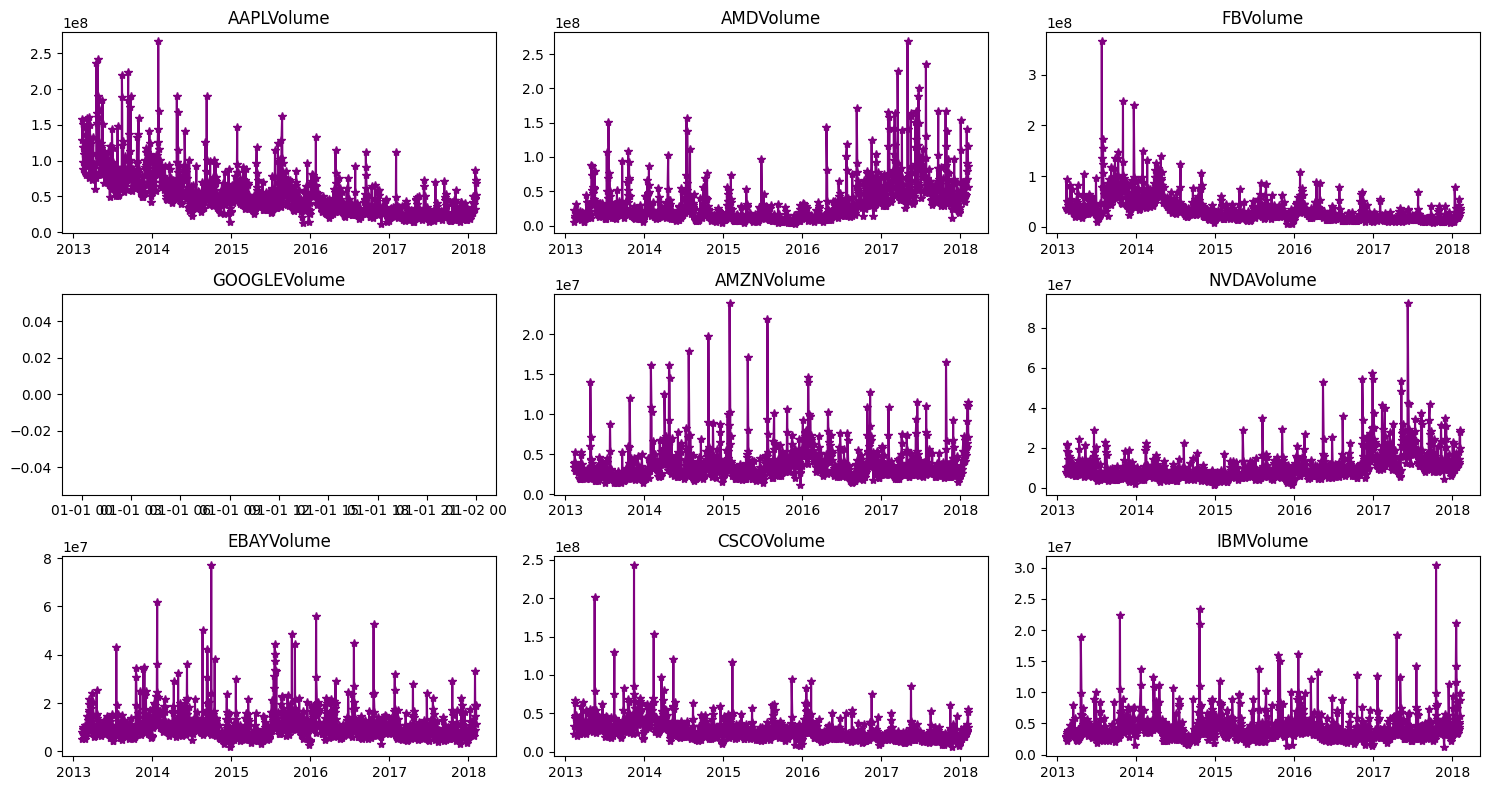

In [9]:

companies=["AAPL","AMD","FB","GOOGLE","AMZN","NVDA","EBAY","CSCO","IBM"]


plt.figure(figsize=(15,8))
for index ,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c=df[df["Name"]==company]
    plt.plot(c["date"],c["close"],c="r",label="close",marker="+")
    plt.plot(c["date"],c["open"],c="g",label="open",marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()
plt.figure(figsize=(15,8))
for index ,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c=df[df["Name"]==company]
    plt.plot(c["date"],c["volume"],c="purple",marker="*")
    plt.title(f"{company}Volume")
    plt.tight_layout()

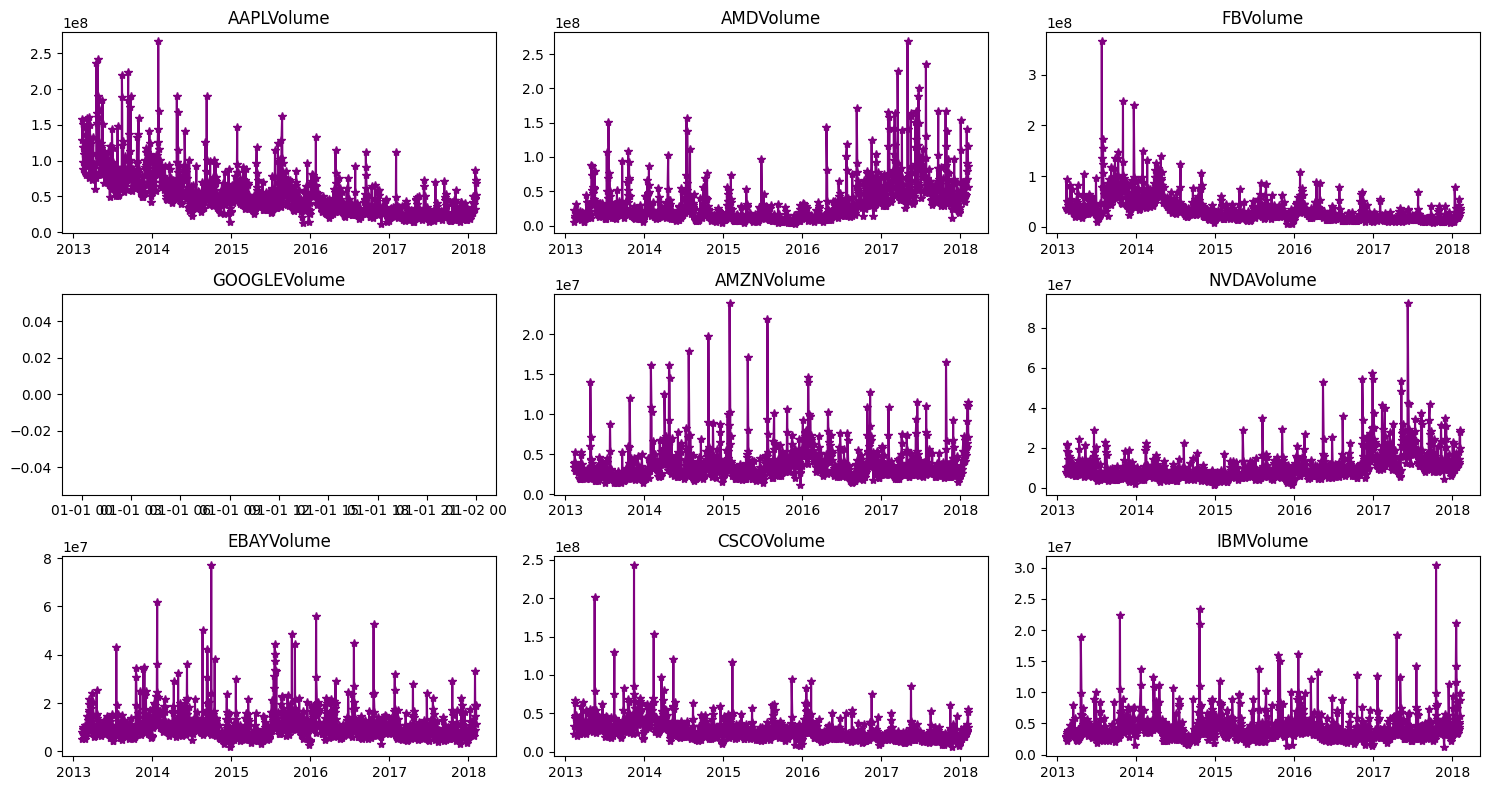

In [11]:
plt.figure(figsize=(15,8))
for index ,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c=df[df["Name"]==company]
    plt.plot(c["date"],c["volume"],c="purple",marker="*")
    plt.title(f"{company}Volume")
    plt.tight_layout()


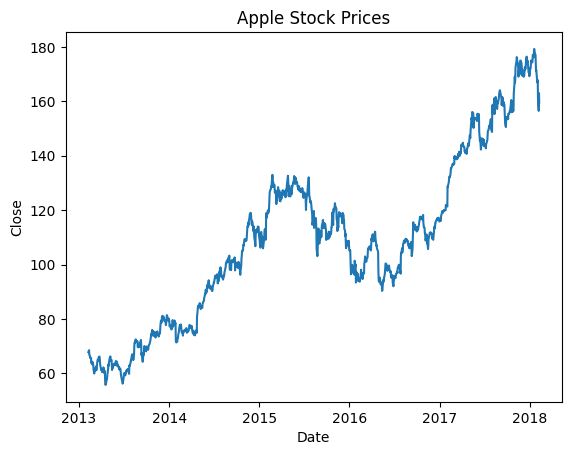

In [13]:
apple=df[df["Name"]=="AAPL"]
prediction_range=apple.loc[(apple["date"]>datetime(2013,1,1))
&(apple["date"]<datetime(2018,1,1))]
plt.plot(apple["date"],apple["close"])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [15]:
close_df=apple.filter(["close"])
dataset=close_df.values
training=int(np.ceil(len(dataset)*.95))
print(training)

1197


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
train_df=scaled_data[0:int(training),:]
x_train=[]
y_train=[]
for i in range(60,len(train_df)):
    x_train.append(train_df[i-60:i,0])
    y_train.append(train_df[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [19]:
from tensorflow import keras
model=keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000020F22620520>>

In [21]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
36/36 [==============================] - 12s 92ms/step - loss: 0.0212
Epoch 2/10
36/36 [==============================] - 3s 85ms/step - loss: 0.0089
Epoch 3/10
36/36 [==============================] - 3s 77ms/step - loss: 0.0089
Epoch 4/10
36/36 [==============================] - 3s 83ms/step - loss: 0.0078
Epoch 5/10
36/36 [==============================] - 3s 79ms/step - loss: 0.0073
Epoch 6/10
36/36 [==============================] - 3s 77ms/step - loss: 0.0071
Epoch 7/10
36/36 [==============================] - 3s 80ms/step - loss: 0.0066
Epoch 8/10
36/36 [==============================] - 3s 87ms/step - loss: 0.0071
Epoch 9/10
36/36 [==============================] - 3s 75ms/step - loss: 0.0068
Epoch 10/10
36/36 [==============================] - 3s 75ms/step - loss: 0.0060


In [23]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(mse)

print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 [==============================] - 2s 45ms/step
MSE 34.89812884028242
RMSE 5.907463824712126


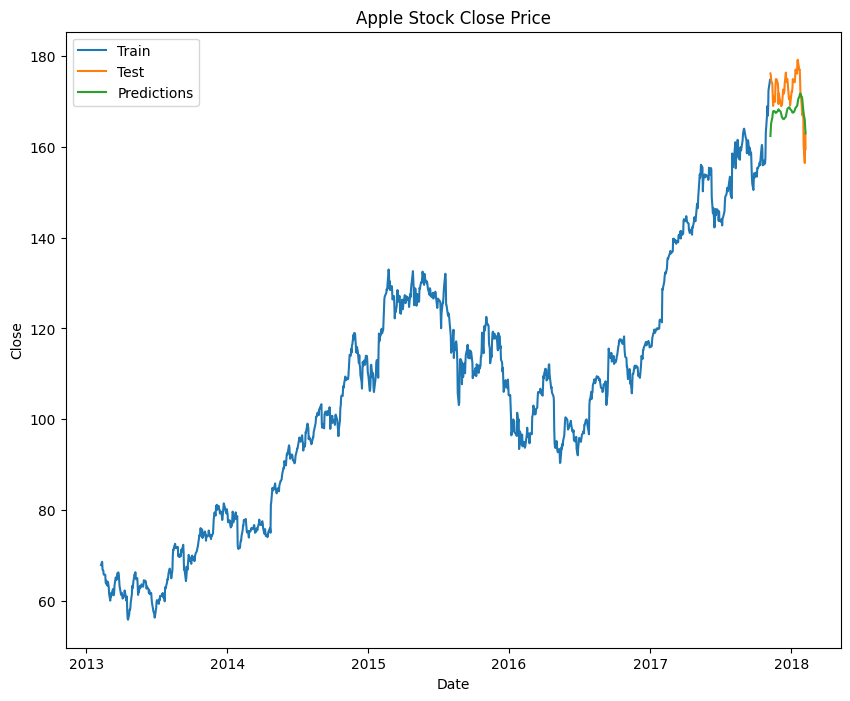

In [25]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])